In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def vector(on=False):
    if on:
        sc.set_figure_params(dpi=50, dpi_save=600, vector_friendly=False)
    else:
        sc.set_figure_params(dpi=50, dpi_save=600, vector_friendly=True)
vector(False)

# Sup3A

In [3]:
adata = sc.read_h5ad('/data1/fengyu/methods/zy/P5_D06053D2_ananlysis/Latest_analysis_6.12/readid4/Final_D06053D2_after_processed_cellbin.h5ad')
meta=pd.read_csv('/data1/fengyu/methods/zy/script_for_github_new/D06053D2_meta_with_all_cellid4_tsv.gz', sep='\t', comment='#')
gem = pd.read_csv('/data3/zhanxiaojuan/03.LC/00.raw_data/stereo_gef_gem_h5ad/D06053D2/D06053D2.cellbin.gem', sep='\t', comment='#')

/tmp/ipykernel_1705929/1616986820.py:2: DtypeWarning: Columns (4,9) have mixed types. Specify dtype option on import or set low_memory=False.
  meta=pd.read_csv('/data1/fengyu/methods/zy/script_for_github_new/D06053D2_meta_with_all_cellid4_tsv.gz', sep='\t', comment='#')


In [19]:
tissue_outline=pd.DataFrame(adata.uns['tissue_outline'],columns=['x','y'])

In [5]:
adata.obs['cellID']= range(adata.shape[0])
adata.obs['cellID']=adata.obs['cellID'].map(str)
adata.obs['bin50_x']=adata.obs['x']//50*50
adata.obs['bin50_y']=adata.obs['y']//50*50

array_2d = adata.obsm['cell_border'].reshape(-1, adata.obsm['cell_border'].shape[-1])

# 创建 DataFrame
df = pd.DataFrame(array_2d)
df['cellID'] = df.index // 32
df['cellID']=df['cellID'].astype(str)
df.rename(columns={0:'x',1:'y'}, inplace=True)
df_filtered = df[(df['x'] != 32767) & (df['y'] != 32767)]
df_filtered = pd.merge(df_filtered, adata.obs[['x','y','cellID']], on='cellID', how='left')
df_filtered['x']=df_filtered['x_x']+df_filtered['x_y']
df_filtered['y']=df_filtered['y_x']+df_filtered['y_y']
df_cellborder=df_filtered[['cellID','x','y']]

In [7]:
#处理IGH
IGH = adata.obs.dropna(subset=['IGHcdr3aa'])
TRB = adata.obs.dropna(subset=['TRBcdr3aa'])
IGH_cellid = IGH['cellID']
IGH_cellid = IGH_cellid.astype(str)
IGH_border = df_cellborder[df_cellborder['cellID'].isin(IGH_cellid)]

TRB_cellid = TRB['cellID']
TRB_cellid = TRB_cellid.astype(str)
TRB_border = df_cellborder[df_cellborder['cellID'].isin(TRB_cellid)]

IGH_border['cellID'].nunique(),TRB_border['cellID'].nunique()

(14625, 4332)

In [8]:
cell = meta.copy()


14625
0
0


,readname,AlignVHits,AlignDHits,AlignJHits,AlignCHits,cloneID,cdr3aa,cdr3nt,isotype,priisotype,...,y,mutation,CDR3Begin,CDR3End,loc,func,cdr3name,cellID,cid_umi,TCRorBCR


In [10]:
IGH_cellid = IGH_cellid.astype(int)
IGH_cell = cell[cell['isotype'] == 'IGH']
IGH_cell.shape[0]
print(len(IGH_cellid))
IGH_XCR_reads = IGH_cell[IGH_cell['cellID'].isin(IGH_cellid)]
print(IGH_XCR_reads['cellID'].nunique())
print(IGH_XCR_reads.shape[0])
IGH_XCR_reads.head()

14625
14625
2534969


,readname,AlignVHits,AlignDHits,AlignJHits,AlignCHits,cloneID,cdr3aa,cdr3nt,isotype,priisotype,...,y,mutation,CDR3Begin,CDR3End,loc,func,cdr3name,cellID,cid_umi,TCRorBCR
103910,M1ML150001777L1C008R02102453475,IGHV1OR21-1*00(167),"IGHD3-10*00(35),IGHD3-16*00(34),IGHD6-13*00(30)",IGHJ5*00(138),NaN,SR_54171,CVRARGSDYSGSGTYDLW,TGTGTGAGGGCCCGGGGTTCGGATTATTCTGGGTCGGGGACTTATG...,IGH,NaN,...,9064,291|350|373|0|59|SC292TSA295TSG302ASA305GSG307...,51.0,105.0,15652_9064,Functional,CVRARGSDYSGSGTYDLW@IGH,31204,CGATTCGCCTTGCTGAATCTCCCGG_GCGGGAACTT,BCR
103911,M1ML150001777L1C027R03306003846,IGHV1-46*00(183),"IGHD3-10*00(35),IGHD3-16*00(34),IGHD6-13*00(30)",IGHJ1*00(129),NaN,SR_42368,CARARGSDYSGSGTYDIW,TGTGCGAGGGCCCGGGGTTCGGATTATTCTGGGTCGGGGACTTATG...,IGH,NaN,...,9064,291|350|373|0|59|SA295TSG302ASG307CSG330ASG333...,51.0,105.0,15652_9064,Functional,CARARGSDYSGSGTYDIW@IGH,31204,CGATTCGCCTTGCTGAATCTCCCGG_GCGGGAACTT,BCR
103912,M1ML150001777L1C036R00200078828,IGHV1-46*00(199),"IGHD3-10*00(35),IGHD3-16*00(34),IGHD6-13*00(30)","IGHJ1*00(129),IGHJ4*00(129),IGHJ5*00(129)",NaN,SR_42368,CARARGSDYSGSGTYDIW,TGTGCGAGGGCCCGGGGTTCGGATTATTCTGGGTCGGGGACTTATG...,IGH,NaN,...,9064,291|350|373|0|59|SA295TSG302ASG307CSG333ASG335...,51.0,105.0,15652_9064,Functional,CARARGSDYSGSGTYDIW@IGH,31204,CGATTCGCCTTGCTGAATCTCCCGG_GCGCGAACTT,BCR
103913,M1ML150001777L1C012R02702658034,IGHV3-73*00(360),"IGHD5-5*00(25),IGHD6-13*00(25),TRBD1*00(25)",IGHJ6*00(207),NaN,SR_3697,CTRDSNYYYGMYVW,TGTACTAGAGACAGCAACTACTACTACGGCATGTACGTCTGG,IGH,NaN,...,9064,285|357|379|0|72||360.0,63.0,105.0,15652_9064,Functional,CTRDSNYYYGMYVW@IGH,31204,CGATTCGCCTTGCTGAATCTCCCGG_GCGGGAACTT,BCR
103914,M1ML150001777L1C019R00800502632,IGHV1-46*00(199),"IGHD3-10*00(30),IGHD6-13*00(30),IGHD6-19*00(30)",IGHJ4*00(127),NaN,SR_42367,CARARGSDYSGSGTYDHW,TGTGCGAGGGCCCGGGGTTCGGATTATTCTGGGTCGGGGACTTATG...,IGH,NaN,...,9064,291|350|373|0|59|SA295TSG302ASG307CSG333ASG335...,51.0,105.0,15652_9064,Functional,CARARGSDYSGSGTYDHW@IGH,31204,CGATTCGCCTTGCTGAATCTCCCGG_GCGGGAACTT,BCR


In [11]:
TRB_cellid = TRB_cellid.astype(int)
TRB_cell = cell[cell['isotype'] == 'TRB']
TRB_cell.shape[0]
print(len(TRB_cellid))
TRB_XCR_reads = TRB_cell[TRB_cell['cellID'].isin(TRB_cellid)]
print(TRB_XCR_reads['cellID'].nunique())
print(TRB_XCR_reads.shape[0])
TRB_XCR_reads.head()

4332
4332
943315


,readname,AlignVHits,AlignDHits,AlignJHits,AlignCHits,cloneID,cdr3aa,cdr3nt,isotype,priisotype,...,y,mutation,CDR3Begin,CDR3End,loc,func,cdr3name,cellID,cid_umi,TCRorBCR
105610,M1ML150001777L1C020R01904736251,TRBV7-2*00(260),TRBD1*00(25),TRBJ1-1*00(235),TRBC1*00(90),SR_61,CASSLDGAGQNTEAFF,TGTGCCAGCAGCTTAGATGGGGCAGGACAGAACACTGAAGCTTTCTTT,TRB,NaN,...,12921,294|346|367|0|52||260.0,36.0,84.0,10547_12921,Functional,CASSLDGAGQNTEAFF@TRB,127902,CAACACTAATACAGATATACCAATA_CAATCGCGCG,TCR
105611,M1ML150001777L1C033R02601949852,TRBV7-2*00(250),TRBD1*00(25),TRBJ1-1*00(235),TRBC1*00(100),SR_61,CASSLDGAGQNTEAFF,TGTGCCAGCAGCTTAGATGGGGCAGGACAGAACACTGAAGCTTTCTTT,TRB,NaN,...,12921,296|346|367|0|50||250.0,34.0,82.0,10547_12921,Functional,CASSLDGAGQNTEAFF@TRB,127902,CAACACTAATACAGATATACCAATA_CAATCGCGCG,TCR
105612,M1ML150001777L1C035R00301384290,TRBV7-2*00(250),TRBD2*00(30),TRBJ1-1*00(235),TRBC1*00(100),SR_61,CASSLDGAGQNTEAFF,TGTGCCAGCAGCTTAGATGGGGCAGGACAGAACACTGAAGCTTTCTTT,TRB,NaN,...,12921,296|346|367|0|50||250.0,34.0,82.0,10547_12921,Functional,CASSLDGAGQNTEAFF@TRB,127902,CAACACTAATACAGATATACCAATA_CAATCGCGCG,TCR
105624,M1ML150001777L1C011R00802792431,TRBV7-8*00(245),TRBD2*00(45),TRBJ2-3*00(215),TRBC2*00(100),SR_19035,CASSVTSGHTDTQYF,TGTGCCAGCAGCGTTACTAGCGGGCACACAGATACGCAGTATTTT,TRB,NaN,...,12921,293|342|367|0|49||245.0,37.0,82.0,10547_12921,Functional,CASSVTSGHTDTQYF@TRB,127902,CAACACTAATACAGATATACCAATA_CAATCGCGCG,TCR
105626,M1ML150001777L1C033R04209759143,TRBV4-1*00(310),TRBD1*00(25),TRBJ1-2*00(205),TRBC1*00(100),SR_194,CASSQDQGLGYTF,TGCGCCAGCAGCCAAGATCAGGGGCTTGGCTACACCTTC,TRB,NaN,...,12921,284|346|364|0|62||310.0,43.0,82.0,10547_12921,Functional,CASSQDQGLGYTF@TRB,127902,CAACACTAATACAGATATACCAATA_CAATCGCGCG,TCR


In [12]:
IGH_target_genes = ['IGHA1', 'IGHA2', 'IGHG1', 'IGHG2', 'IGHG3','IGHM','IGHD','IGHE']
IGH_filtered_gene = gem[gem['geneName'].isin(IGH_target_genes)]
print(IGH_filtered_gene)
TRB_target_genes = ['TRBC1', 'TRBC2',]
TRB_filtered_gene = gem[gem['geneName'].isin(TRB_target_genes)]
print(TRB_filtered_gene)

                   geneID geneName      x      y  MIDCount  ExonCount  CellID
1680      ENSG00000211897    IGHG3  11560  17186         1          1  187605
1959      ENSG00000211895    IGHA1  11555  17198         1          1  187605
1975      ENSG00000211897    IGHG3  11570  17198         1          1  187605
2890      ENSG00000211896    IGHG1  11583  17184         1          1  187601
4224      ENSG00000211896    IGHG1  12035  16900         1          1  187599
...                   ...      ...    ...    ...       ...        ...     ...
90057836  ENSG00000211899     IGHM  13667  14925         1          1  172928
90058062  ENSG00000211895    IGHA1  13693  14927         1          1  172928
90058774  ENSG00000211896    IGHG1  13684  14907         1          1  172929
90060686  ENSG00000211896    IGHG1  13674  15041         1          1  172932
90060687  ENSG00000211897    IGHG3  13674  15041         1          1  172932

[325219 rows x 7 columns]
                   geneID geneName   

In [14]:
IGH_filtered_gene_cor = IGH_filtered_gene[['x','y']].drop_duplicates(subset=['x','y'])
TRB_filtered_gene_cor = TRB_filtered_gene[['x','y']].drop_duplicates(subset=['x','y'])
#TRD_filtered_gene_cor = TRD_filtered_gene[['x','y']].drop_duplicates(subset=['x','y'])
TRB_filtered_gene_cor.shape[0],IGH_filtered_gene_cor.shape[0]

(2747, 292205)

In [15]:
from shapely.geometry import Point, Polygon
from shapely.strtree import STRtree
import pandas as pd
from tqdm import tqdm
import concurrent.futures

# 示例数据 df1
df7 = TRB_border
# 示例数据 df2
df8 = TRB_filtered_gene_cor

# 将 df1 中的每个 cellID 的顶点坐标转换为多边形
polygons = df7.groupby('cellID').apply(
    lambda group: Polygon(zip(group['x'], group['y']))
).reset_index(name='polygon')

# 创建空间索引
spatial_index = STRtree(polygons['polygon'])

# 将 df2 中的每个点转换为 Point 对象
df8['point'] = df8.apply(lambda row: Point(row['x'], row['y']), axis=1)


def find_cellID(point, polygons, spatial_index):
    # 使用空间索引快速筛选可能包含点的多边形
    possible_matches_index = list(spatial_index.query(point))
    possible_matches = polygons.iloc[possible_matches_index]
    for _, row in possible_matches.iterrows():
        # 使用 intersects 方法替代 contains 方法
        if row['polygon'].intersects(point):
            return row['cellID']
    return None



# 单线程处理

def process_single_thread(df, polygons, spatial_index):
    df['cellID'] = df['point'].apply(lambda point: find_cellID(point, polygons, spatial_index))
    return df
# 调用单线程处理函数
df8 = process_single_thread(df8, polygons, spatial_index)

print(df8)
df8 = df8.dropna()
TRB_filtered_gene_cor_withcellid = df8

              x      y                point  cellID
28196     11665  17145  POINT (11665 17145)    None
99520     11872  16643  POINT (11872 16643)    None
100933    11900  16725  POINT (11900 16725)    None
192398    11155  16713  POINT (11155 16713)    None
218237    10981  16715  POINT (10981 16715)    None
...         ...    ...                  ...     ...
89877139  13192  15067  POINT (13192 15067)  172561
89887087  13160  15035  POINT (13160 15035)    None
89888001  13170  15068  POINT (13170 15068)  172585
90004781  13337  14897  POINT (13337 14897)    None
90035135  13769  15078  POINT (13769 15078)    None

[2747 rows x 4 columns]


In [16]:
from shapely.geometry import Point, Polygon
from shapely.strtree import STRtree
import pandas as pd
from tqdm import tqdm
import concurrent.futures

# 示例数据 df1
df9 = IGH_border
# 示例数据 df2
df10 = IGH_filtered_gene_cor

# 将 df1 中的每个 cellID 的顶点坐标转换为多边形
polygons = df9.groupby('cellID').apply(
    lambda group: Polygon(zip(group['x'], group['y']))
).reset_index(name='polygon')

# 创建空间索引
spatial_index = STRtree(polygons['polygon'])

# 将 df2 中的每个点转换为 Point 对象
df10['point'] = df10.apply(lambda row: Point(row['x'], row['y']), axis=1)


def find_cellID(point, polygons, spatial_index):
    # 使用空间索引快速筛选可能包含点的多边形
    possible_matches_index = list(spatial_index.query(point))
    possible_matches = polygons.iloc[possible_matches_index]
    for _, row in possible_matches.iterrows():
        # 使用 intersects 方法替代 contains 方法
        if row['polygon'].intersects(point):
            return row['cellID']
    return None



# 单线程处理

def process_single_thread(df, polygons, spatial_index):
    df['cellID'] = df['point'].apply(lambda point: find_cellID(point, polygons, spatial_index))
    return df
# 调用单线程处理函数
df10 = process_single_thread(df10, polygons, spatial_index)

print(df10)
df10 = df10.dropna()
df10['cellID'].nunique()
IGH_filtered_gene_cor_withcellid = df10

              x      y                point cellID
1680      11560  17186  POINT (11560 17186)   None
1959      11555  17198  POINT (11555 17198)   None
1975      11570  17198  POINT (11570 17198)   None
2890      11583  17184  POINT (11583 17184)   None
4224      12035  16900  POINT (12035 16900)   None
...         ...    ...                  ...    ...
90057654  13678  14922  POINT (13678 14922)   None
90057836  13667  14925  POINT (13667 14925)   None
90058062  13693  14927  POINT (13693 14927)   None
90058774  13684  14907  POINT (13684 14907)   None
90060686  13674  15041  POINT (13674 15041)   None

[292205 rows x 4 columns]


In [17]:
IGH_border_list = IGH_border.groupby('cellID').apply(lambda group: [[x, y] for x, y in zip(group['x'], group['y'])]).tolist()
filtered_cell_borders_list = IGH_border_list
# 将每个细胞的坐标转换为 NumPy 数组
filtered_cell_borders_list = [np.array(cell) for cell in filtered_cell_borders_list]
filtered_cell_borders_list[0]

array([[12556,  5880],
       [12560,  5884],
       [12564,  5895],
       [12569,  5895],
       [12577,  5898],
       [12581,  5898],
       [12592,  5887],
       [12593,  5883],
       [12589,  5877],
       [12578,  5871],
       [12567,  5872]])

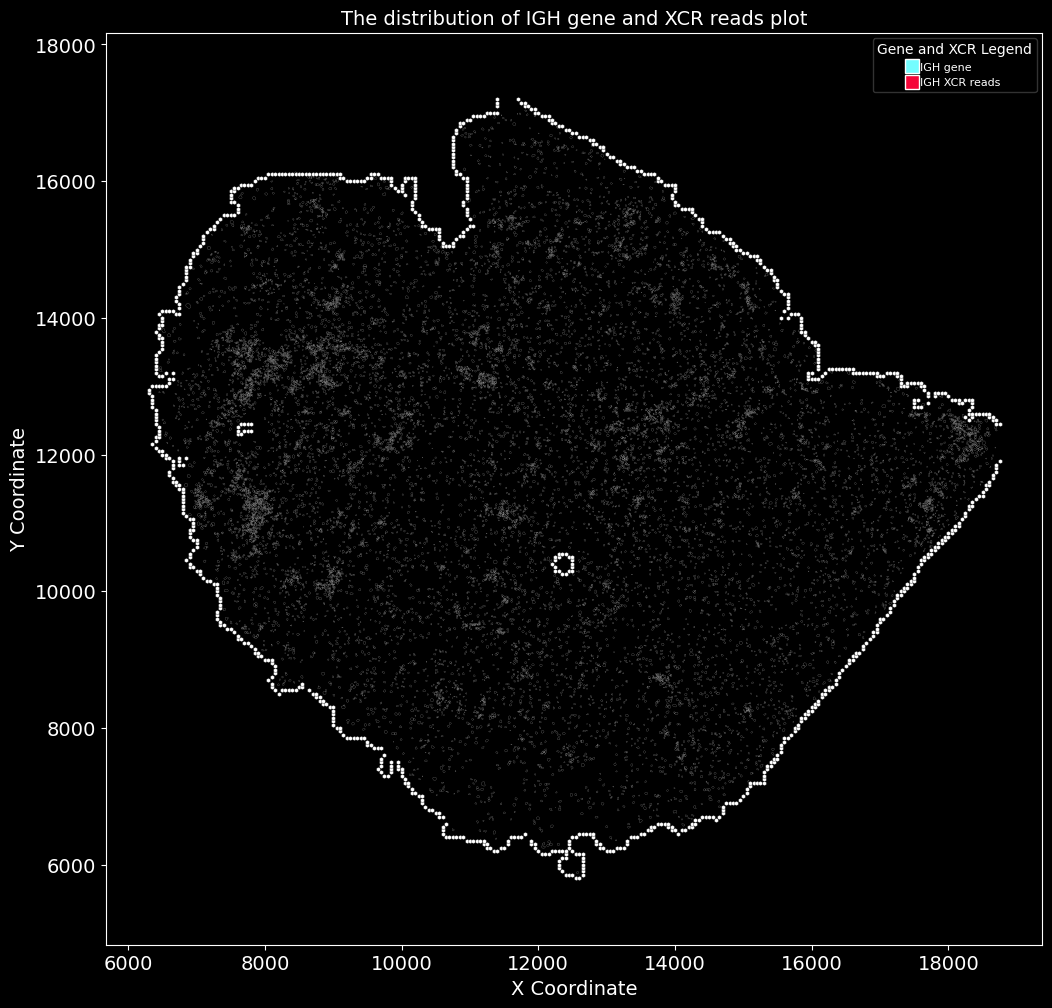

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
from scipy.interpolate import splprep, splev
from matplotlib.path import Path
from matplotlib.path import Path
from matplotlib.patches import PathPatch
from matplotlib.collections import PatchCollection

# 设置纯黑背景
plt.style.use('dark_background')

# 创建图形和坐标轴
fig, ax = plt.subplots(figsize=(12, 12))
fig.patch.set_facecolor('black')
ax.set_facecolor('black')

# 定义颜色变量确保一致性
IGH_FILTERED_COLOR =  '#73FDFF'  # 亮蓝
IGH_XCR_COLOR = '#F50538'          # 红色
TRB_FILTERED_COLOR = '#00F900' # 亮绿
TRB_XCR_COLOR = '#FBFD79'       # 紫色
EDGE_COLOR = 'white'           # 白色


ax.scatter(IGH_XCR_reads['x'], 
           IGH_XCR_reads['y'], 
           color=IGH_XCR_COLOR, s=0.05, marker='s')

# 绘制IGH散点图（使用定义的颜色）
ax.scatter(IGH_filtered_gene_cor_withcellid['x'], 
           IGH_filtered_gene_cor_withcellid['y'], 
           color=IGH_FILTERED_COLOR, s=0.05, marker='s')

# 平滑边界函数（保持不变）
def smooth_boundary(boundary, smoothness=0.5):
    x = boundary[:, 0]
    y = boundary[:, 1]
    x = np.append(x, x[0])
    y = np.append(y, y[0])
    tck, u = splprep([x, y], s=smoothness * len(x), per=True)
    u_new = np.linspace(u.min(), u.max(), 100)
    x_new, y_new = splev(u_new, tck, der=0)
    return np.column_stack((x_new, y_new))

# 创建细胞边界（使用定义的颜色）
patches = []
for cell_boundary in filtered_cell_borders_list:
    if len(cell_boundary) < 3:
        continue
    smoothed_boundary = smooth_boundary(cell_boundary, smoothness=0.5)
    vertices = smoothed_boundary
    codes = [Path.LINETO] * len(vertices)
    codes[0] = Path.MOVETO
    codes[-1] = Path.CLOSEPOLY
    path = Path(vertices, codes)
    patch = PathPatch(path,
                     edgecolor='white',
                     facecolor='none',
                     linewidth=0.1,
                     antialiased=True)
    patches.append(patch)

ax.add_collection(PatchCollection(patches, match_original=True))

sns.scatterplot(x='x', y='y', 
               data=tissue_outline,
               color=EDGE_COLOR,
               marker='h',
               s=10,
               edgecolor='black',  # 添加深色边缘
               linewidth=0.2,       # 边缘线宽
               ax=ax)

# 设置坐标轴
ax.set_xlim(0, 32768)
ax.set_ylim(0, 32768)
ax.grid(False)
ax.axis('equal')

# 创建精确匹配的图例
legend_elements = [
    Line2D([0], [0], marker='s', color='w', label='IGH gene', markerfacecolor=IGH_FILTERED_COLOR, markersize=10),
    Line2D([0], [0], marker='s', color='w', label='IGH XCR reads', markerfacecolor=IGH_XCR_COLOR, markersize=10),]

# 添加图例并设置样式
legend = ax.legend(handles=legend_elements,
                  loc='upper right',
                  frameon=True,
                  framealpha=0.2,
                  facecolor='black',
                  edgecolor='white',
                  fontsize=8,
                  title='Gene and XCR Legend',
                  title_fontsize=10)

# 设置图例文本颜色
plt.setp(legend.get_texts(), color='white')

# 设置标题
ax.set_title("The distribution of IGH gene and XCR reads plot", color='white')
ax.set_xlabel("X Coordinate", color='white')
ax.set_ylabel("Y Coordinate", color='white')

# 保存图像
plt.savefig('IGH_gene_and_XCR_reads_visualization.png',
           dpi=2500,
           bbox_inches='tight',
           facecolor='black',
           transparent=False)

plt.show()

In [21]:
TRB_border_list = TRB_border.groupby('cellID').apply(lambda group: [[x, y] for x, y in zip(group['x'], group['y'])]).tolist()
filtered_cell_borders_list = TRB_border_list
# 将每个细胞的坐标转换为 NumPy 数组
filtered_cell_borders_list = [np.array(cell) for cell in filtered_cell_borders_list]
filtered_cell_borders_list[0]

array([[14194, 11917],
       [14182, 11905],
       [14182, 11908],
       [14179, 11911],
       [14177, 11918],
       [14162, 11930],
       [14167, 11933],
       [14173, 11934],
       [14180, 11930],
       [14194, 11927]])

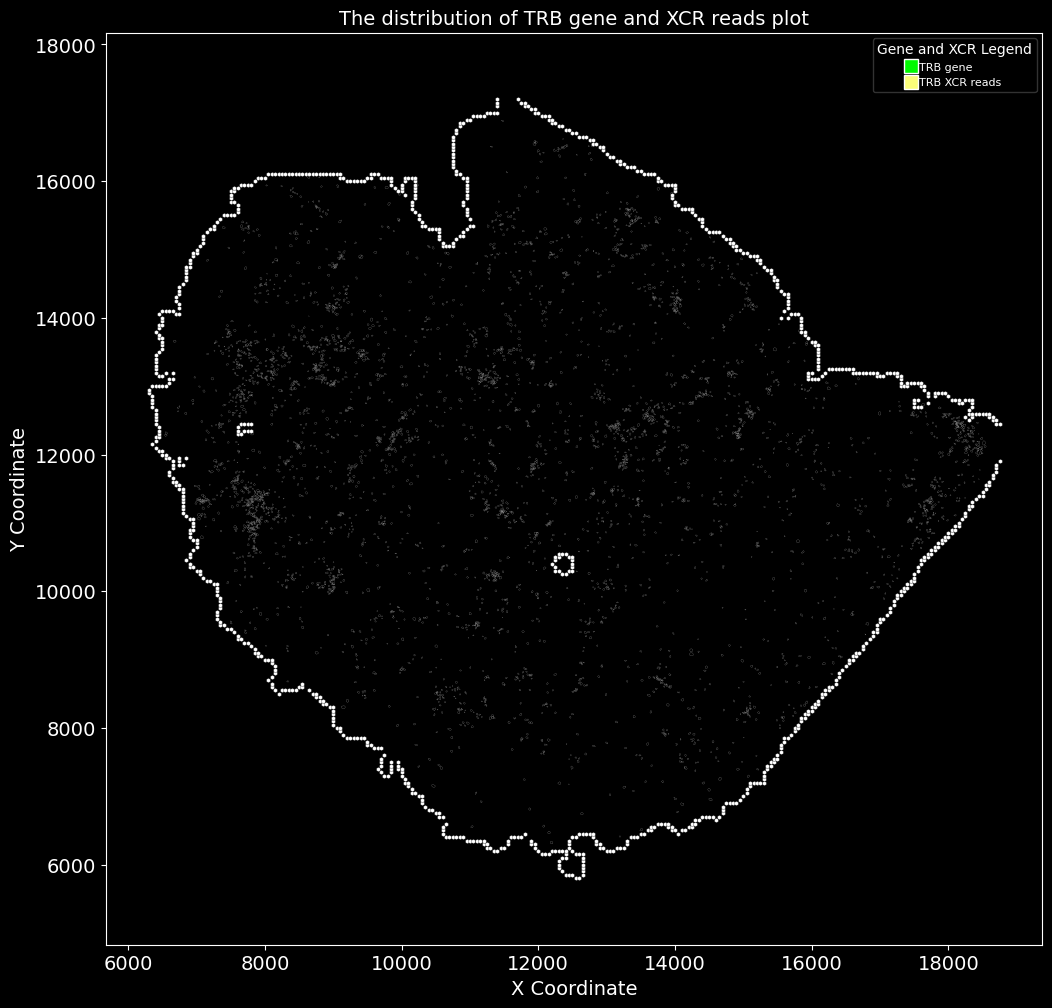

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
from scipy.interpolate import splprep, splev
from matplotlib.path import Path
from matplotlib.path import Path
from matplotlib.patches import PathPatch
from matplotlib.collections import PatchCollection

# 设置纯黑背景
plt.style.use('dark_background')

# 创建图形和坐标轴
fig, ax = plt.subplots(figsize=(12, 12))
fig.patch.set_facecolor('black')
ax.set_facecolor('black')

# 定义颜色变量确保一致性
IGH_FILTERED_COLOR =  '#73FDFF'  # 亮蓝
IGH_XCR_COLOR = '#F50538'          # 红色
TRB_FILTERED_COLOR = '#00F900' # 亮绿
TRB_XCR_COLOR = '#FBFD79'       # 黄色
EDGE_COLOR = 'white'           # 白色


ax.scatter(TRB_XCR_reads['x'], 
           TRB_XCR_reads['y'], 
           color=TRB_XCR_COLOR, s=0.05, marker='s')

# 绘制TRB散点图（使用定义的颜色）
ax.scatter(TRB_filtered_gene_cor_withcellid['x'], 
           TRB_filtered_gene_cor_withcellid['y'], 
           color=TRB_FILTERED_COLOR, s=0.05, marker='s')


# 平滑边界函数（保持不变）
def smooth_boundary(boundary, smoothness=0.5):
    x = boundary[:, 0]
    y = boundary[:, 1]
    x = np.append(x, x[0])
    y = np.append(y, y[0])
    tck, u = splprep([x, y], s=smoothness * len(x), per=True)
    u_new = np.linspace(u.min(), u.max(), 100)
    x_new, y_new = splev(u_new, tck, der=0)
    return np.column_stack((x_new, y_new))

# 创建细胞边界（使用定义的颜色）
patches = []
for cell_boundary in filtered_cell_borders_list:
    if len(cell_boundary) < 3:
        continue
    smoothed_boundary = smooth_boundary(cell_boundary, smoothness=0.5)
    vertices = smoothed_boundary
    codes = [Path.LINETO] * len(vertices)
    codes[0] = Path.MOVETO
    codes[-1] = Path.CLOSEPOLY
    path = Path(vertices, codes)
    patch = PathPatch(path,
                     edgecolor='white',
                     facecolor='none',
                     linewidth=0.1,
                     antialiased=True)
    patches.append(patch)

ax.add_collection(PatchCollection(patches, match_original=True))

sns.scatterplot(x='x', y='y', 
               data=tissue_outline,
               color=EDGE_COLOR,
               marker='h',
               s=10,
               edgecolor='black',  # 添加深色边缘
               linewidth=0.2,       # 边缘线宽
               ax=ax)


# 设置坐标轴
ax.set_xlim(0, 32768)
ax.set_ylim(0, 32768)
ax.grid(False)
ax.axis('equal')

# 创建精确匹配的图例
legend_elements = [
    Line2D([0], [0], marker='s', color='w', label='TRB gene', markerfacecolor=TRB_FILTERED_COLOR, markersize=10),
    Line2D([0], [0], marker='s', color='w', label='TRB XCR reads', markerfacecolor=TRB_XCR_COLOR, markersize=10),
]

# 添加图例并设置样式
legend = ax.legend(handles=legend_elements,
                  loc='upper right',
                  frameon=True,
                  framealpha=0.2,
                  facecolor='black',
                  edgecolor='white',
                  fontsize=8,
                  title='Gene and XCR Legend',
                  title_fontsize=10)

# 设置图例文本颜色
plt.setp(legend.get_texts(), color='white')

# 设置标题
ax.set_title("The distribution of TRB gene and XCR reads plot", color='white')
ax.set_xlabel("X Coordinate", color='white')
ax.set_ylabel("Y Coordinate", color='white')

# 保存图像
plt.savefig('TRB_gene_and_XCR_reads_visualization.png',
           dpi=2500,
           bbox_inches='tight',
           facecolor='black',
           transparent=False)

plt.show()

In [23]:
IGH_TRB_cellborder_concatenated = pd.concat([IGH_border['cellID'], TRB_border['cellID']])

# 获取并集（去重后的所有cellID）
IGH_TRB_cellborder_concatenated  =IGH_TRB_cellborder_concatenated.unique()

In [24]:
IGH_TRB_cellborder_concatenated = df_cellborder[df_cellborder['cellID'].isin(IGH_TRB_cellborder_concatenated)]

In [25]:
IGH_TRB_cellborder_concatenated_list = IGH_TRB_cellborder_concatenated.groupby('cellID').apply(lambda group: [[x, y] for x, y in zip(group['x'], group['y'])]).tolist()
filtered_cell_borders_list = IGH_TRB_cellborder_concatenated_list
# 将每个细胞的坐标转换为 NumPy 数组
filtered_cell_borders_list = [np.array(cell) for cell in filtered_cell_borders_list]
filtered_cell_borders_list[0]

array([[12556,  5880],
       [12560,  5884],
       [12564,  5895],
       [12569,  5895],
       [12577,  5898],
       [12581,  5898],
       [12592,  5887],
       [12593,  5883],
       [12589,  5877],
       [12578,  5871],
       [12567,  5872]])

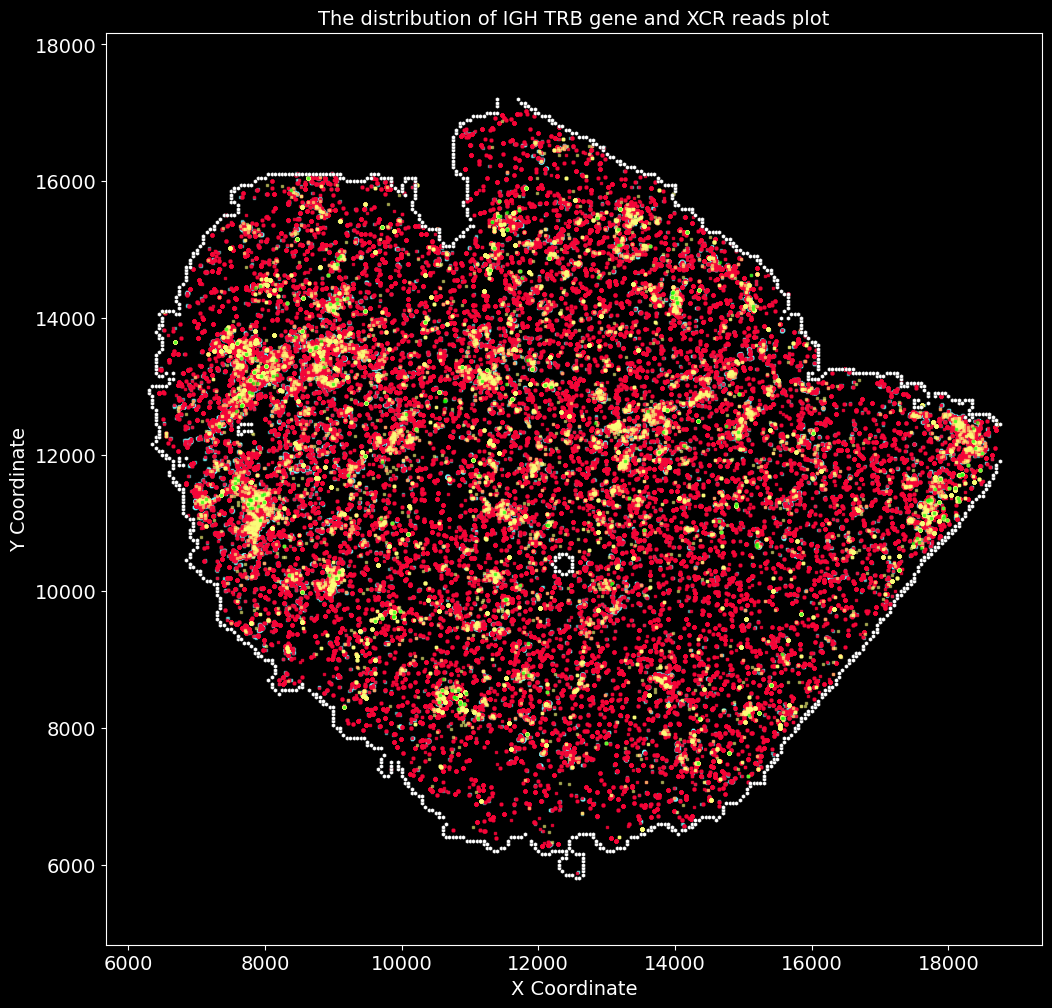

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
from scipy.interpolate import splprep, splev

def vector(on=False):
    if on:
        sc.set_figure_params(dpi=50, dpi_save=300, vector_friendly=False)
    else:
        sc.set_figure_params(dpi=50, dpi_save=300, vector_friendly=True)
vector(False)


# 设置纯黑背景
plt.style.use('dark_background')

# 创建图形和坐标轴
fig, ax = plt.subplots(figsize=(12, 12))
fig.patch.set_facecolor('black')
ax.set_facecolor('black')

# 定义颜色变量确保一致性
IGH_FILTERED_COLOR =  '#73FDFF'  # 亮蓝
IGH_XCR_COLOR = '#F50538'          
TRB_FILTERED_COLOR = '#00F900' # 亮绿
TRB_XCR_COLOR = '#FBFD79'       
EDGE_COLOR = 'white'           # 白色

# 绘制IGH散点图（使用定义的颜色）
ax.scatter(IGH_filtered_gene_cor_withcellid['x'], 
           IGH_filtered_gene_cor_withcellid['y'], 
           color=IGH_FILTERED_COLOR, s=3, alpha = 0.5,marker='s')

ax.scatter(IGH_XCR_reads['x'], 
           IGH_XCR_reads['y'], 
           color=IGH_XCR_COLOR, s=3,alpha = 0.8,marker='s')

ax.scatter(TRB_XCR_reads['x'], 
           TRB_XCR_reads['y'], 
           color=TRB_XCR_COLOR, s=3,alpha = 0.5, marker='s')

# 绘制TRB散点图（使用定义的颜色）
ax.scatter(TRB_filtered_gene_cor_withcellid['x'], 
           TRB_filtered_gene_cor_withcellid['y'], 
           color=TRB_FILTERED_COLOR, s=3,alpha = 0.5, marker='s')

sns.scatterplot(x='x', y='y', 
               data=tissue_outline,
               color=EDGE_COLOR,
               marker='h',
               s=10,
               edgecolor='black',  # 添加深色边缘
               linewidth=0.2,       # 边缘线宽
               ax=ax)


# 设置坐标轴
ax.set_xlim(0, 32768)
ax.set_ylim(0, 32768)
ax.grid(False)
ax.axis('equal')

# 设置标题
ax.set_title("The distribution of IGH TRB gene and XCR reads plot", color='white')
ax.set_xlabel("X Coordinate", color='white')
ax.set_ylabel("Y Coordinate", color='white')

# 保存图像
plt.savefig('gene_expression_visualization.png',
           dpi = 600 ,
           bbox_inches='tight',
           facecolor='black',
           transparent=False)

plt.show()

# Sup3B

In [3]:
adata = sc.read_h5ad('/data3/zhanxiaojuan/03.LC/01.XCR/M1ML150001777_L01_D06053D2/04.processed_meta/M1ML150001777_L01_D06053D2.meta.preprocessed.h5ad')

/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [4]:
BCR = adata[adata.obs['IGHcdr3aa'].notna()]
BCR.obs.shape[0]

59033

In [5]:
import scanpy as sc
import pandas as pd

# 1) 明确要统计的基因列表
genes_of_interest = [
    'IGHG1', 'IGHG2', 'IGHG3', 'IGHG4',
    'IGHA1', 'IGHA2',
    'IGHG',   # 如果芯片/参考基因组里存在这个总探针/基因
    'IGHM',
    'IGHD'
]

# 2) 只保留 adata 中真实存在的基因
genes_in_adata = BCR.var_names.intersection(genes_of_interest)

# 3) 提取子集并求和（得到每个细胞的综合表达量）
igg_expr = BCR[:, genes_in_adata].X.sum(axis=1)

# 如果是 sparse matrix，sum 出来是 (n_cells,) 的 numpy matrix，
# 需要 A1 或直接 np.asarray 转成 1 维数组
igg_expr = np.asarray(igg_expr).flatten()

# 4) 写回 .obs
BCR.obs['IG_Heavy_chain'] = igg_expr

# 5) 可选：看一眼统计结果
print(BCR.obs['IG_Heavy_chain'].describe())

/tmp/ipykernel_1534455/4282223906.py:24: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  BCR.obs['IG_Heavy_chain'] = igg_expr


count    59033.000000
mean         5.164450
std         10.438289
min          0.000000
25%          1.000000
50%          2.000000
75%          5.000000
max        292.000000
Name: IG_Heavy_chain, dtype: float64


In [6]:
BCR.obs[BCR.obs['IG_Heavy_chain'] != 0]

,dnbCount,area,id,orig.ident,x,y,cellID,bin50_x,bin50_y,TRAcdr3aa,TRBcdr3aa,mutation_percent,CSR,classes,IGK/Lcdr3aa,IGKorIGL,IGHcdr3aa,bin50_location_id,IG_Heavy_chain
0,376,719,0,sample,12574,5883,0,12550,5850,NaN,CASSEEGLAGGYEQYF,0.000000,no,IGHM,CQQYEDLLFTF,IGK,CAHRVLNSGSWDCGALDFW,DNB_12550_5850,2
23,548,908,23,sample,12627,6122,23,12600,6100,NaN,NaN,0.100000,NaN,NaN,CQHYSRYSRTF,IGK,CARGSISWPPYFDYW,DNB_12600_6100,5
27,242,408,27,sample,12617,6029,27,12600,6000,NaN,NaN,0.100000,NaN,NaN,CQQYDNLLFTF,IGK,CARGSISWPPYFDYW,DNB_12600_6000,2
34,629,1088,34,sample,12596,6141,34,12550,6100,NaN,NaN,0.269231,NaN,NaN,NaN,NaN,CARAFGYGSGTYHFDYW,DNB_12550_6100,2
45,266,431,45,sample,12574,6051,45,12550,6050,NaN,NaN,0.061538,NaN,NaN,NaN,NaN,CARVHLDAFCSGDTCLHWYFDFW,DNB_12550_6050,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187605,344,986,187605,sample,12142,16919,187605,12100,16900,NaN,NaN,0.161538,NaN,NaN,CAAWDDSLNGHVVF,IGL,CARVHYYASGTYYTYDAFDIW,DNB_12100_16900,2
187606,672,1557,187606,sample,12093,16904,187606,12050,16900,NaN,NaN,0.223077,NaN,NaN,NaN,NaN,CARGQHLPTGFFDYW,DNB_12050_16900,2
187609,658,1517,187609,sample,11622,17166,187609,11600,17150,NaN,NaN,0.153846,no,IGHA,CQQASAFPLTF,IGK,CARTPLMTTRWFDPW,DNB_11600_17150,1
187610,374,927,187610,sample,11592,17190,187610,11550,17150,NaN,NaN,0.169231,NaN,NaN,NaN,NaN,CARAHTVDSSSTWSRVAFDVW,DNB_11550_17150,1


In [8]:
TCR = adata[adata.obs['TRBcdr3aa'].notna()]
TCR.shape[0]

19092

In [9]:
import scanpy as sc
import pandas as pd

# 1) 明确要统计的基因列表
genes_of_interest = [
    'TRBC1','TRBC2'
]

# 2) 只保留 adata 中真实存在的基因
genes_in_adata = TCR.var_names.intersection(genes_of_interest)

# 3) 提取子集并求和（得到每个细胞的综合表达量）
igg_expr = TCR[:, genes_in_adata].X.sum(axis=1)

# 如果是 sparse matrix，sum 出来是 (n_cells,) 的 numpy matrix，
# 需要 A1 或直接 np.asarray 转成 1 维数组
igg_expr = np.asarray(igg_expr).flatten()

# 4) 写回 .obs
TCR.obs['TB_Heavy_chain'] = igg_expr

# 5) 可选：看一眼统计结果
print(TCR.obs['TB_Heavy_chain'].describe())

/tmp/ipykernel_1534455/847763324.py:20: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  TCR.obs['TB_Heavy_chain'] = igg_expr


count    19092.000000
mean         0.048397
std          0.260073
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          5.000000
Name: TB_Heavy_chain, dtype: float64


In [10]:
TCR.obs[TCR.obs['TB_Heavy_chain'] != 0]

,dnbCount,area,id,orig.ident,x,y,cellID,bin50_x,bin50_y,TRAcdr3aa,TRBcdr3aa,mutation_percent,CSR,classes,IGK/Lcdr3aa,IGKorIGL,IGHcdr3aa,bin50_location_id,TB_Heavy_chain
267,477,1060,267,sample,11071,6615,267,11050,6600,NaN,CASSQAGANYGYTF,NaN,NaN,NaN,CQQYYSTPLTF,IGK,NaN,DNB_11050_6600,1
1383,427,912,1383,sample,13296,6751,1383,13250,6750,NaN,CASSFPTAMNTEAFF,NaN,NaN,NaN,NaN,NaN,NaN,DNB_13250_6750,1
1946,246,538,1946,sample,10669,7163,1946,10650,7150,CAVTSSASKIIF,CASILQGYTEAFF,0.023077,no,IGHA,NaN,NaN,CARDLGVGPGGYFYHGADVW,DNB_10650_7150,1
4686,140,277,4686,sample,13732,7340,4686,13700,7300,NaN,CASSPDRGGNSPLHF,NaN,NaN,NaN,CHQYYSTPLTF,IGK,NaN,DNB_13700_7300,1
4874,306,521,4874,sample,14084,7381,4874,14050,7350,NaN,CASSLRGPSGGAIIETQYF,0.000000,no,IGHM,NaN,NaN,CARHYGITKPADYW,DNB_14050_7350,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182607,175,270,182607,sample,8737,15966,182607,8700,15950,CALGEPNAGNMLTF,CASNDRGQQETQYF,0.138462,no,IGHM,NaN,NaN,CARASPAVVAATLDYW,DNB_8700_15950,1
182631,404,755,182631,sample,9096,15962,182631,9050,15950,NaN,CASRETGYREQYF,0.015385,no,IGHA,NaN,NaN,CAKEEGIYLLRDFDGRNGPFDIW,DNB_9050_15950,1
182635,836,1531,182635,sample,9059,16010,182635,9050,16000,CAENPVTTDSWGKLQF,CASSEAMGRAGNTIYF,NaN,NaN,NaN,NaN,NaN,NaN,DNB_9050_16000,1
183631,320,581,183631,sample,12771,16073,183631,12750,16050,CACATGANSKLTF,CASSPDRGGNSPLHF,NaN,NaN,NaN,NaN,NaN,NaN,DNB_12750_16050,2


# Sup3C

In [11]:
import scanpy as sc

adata1 = sc.read_h5ad('/data3/zhanxiaojuan/03.LC/02.XCR_combine_meta/D06047A2/D06047A2.meta.preprocessed.h5ad')
adata2 = sc.read_h5ad('/data3/zhanxiaojuan/03.LC/02.XCR_combine_meta/D06047C3/D06047C3.meta.preprocessed.h5ad')
adata3 = sc.read_h5ad('/data3/zhanxiaojuan/03.LC/02.XCR_combine_meta/D06047D4/D06047D4.meta.preprocessed.h5ad')
adata4 = sc.read_h5ad('/data3/zhanxiaojuan/03.LC/02.XCR_combine_meta/D06047E1/D06047E1.meta.preprocessed.h5ad')
adata5 = sc.read_h5ad('/data3/zhanxiaojuan/03.LC/02.XCR_combine_meta/D06047E2/D06047E2.meta.preprocessed.h5ad')
adata6 = sc.read_h5ad('/data3/zhanxiaojuan/03.LC/02.XCR_combine_meta/D06047F6/D06047F6.meta.preprocessed.h5ad')
adata7 = sc.read_h5ad('/data3/zhanxiaojuan/03.LC/02.XCR_combine_meta/D06050A2/D06050A2.meta.preprocessed.h5ad')
adata8 = sc.read_h5ad('/data3/zhanxiaojuan/03.LC/02.XCR_combine_meta/D06050C2/D06050C2.meta.preprocessed.h5ad')
adata9 = sc.read_h5ad('/data3/zhanxiaojuan/03.LC/02.XCR_combine_meta/D06050D4/D06050D4.meta.preprocessed.h5ad')
adata10 = sc.read_h5ad('/data3/zhanxiaojuan/03.LC/02.XCR_combine_meta/D06050E4/D06050E4.meta.preprocessed.h5ad')
adata11 = sc.read_h5ad('/data3/zhanxiaojuan/03.LC/01.XCR/M1ML150001777_L01_D06053D2/04.processed_meta/M1ML150001777_L01_D06053D2.meta.preprocessed.h5ad')

# 确保变量名唯一
adata_list = [adata1, adata2, adata3, adata4, adata5, adata6, adata7, adata8, adata9, adata10, adata11]
for adata in adata_list:
    adata.var_names_make_unique()

# 合并数据
batch_categories = ["D06047A2", "D06047C3", "D06047D4", "D06047E1", "D06047E2", "D06047F6", "D06050A2", "D06050C2", "D06050D4", "D06050E4", "D06053D2"]
adata = adata1.concatenate(adata_list[1:], batch_key="batch", batch_categories=batch_categories)

# 确保观测名是字符串类型
adata.obs_names = adata.obs_names.astype(str)

/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarnin

In [12]:
import pandas as pd

# 假设 adata_list 和 batch_categories 已经定义
assert len(adata_list) == len(batch_categories)

# 初始化一个列表，用于存储每个样本的统计结果
sample_info = []

# 遍历 adata_list 和 batch_categories
for i, (adata, batch_name) in enumerate(zip(adata_list, batch_categories)):
    # 计算 TCR 和 BCR 的配对率
    csv = adata.obs[(adata.obs['TRAcdr3aa'].notna()) | 
                    (adata.obs['TRBcdr3aa'].notna()) | 
                    (adata.obs['IGHcdr3aa'].notna()) | 
                    (adata.obs['IGK/Lcdr3aa'].notna())]
    TCR_pair = adata.obs[(adata.obs['TRAcdr3aa'].notna()) & (adata.obs['TRBcdr3aa'].notna())].shape[0]
    TCR_all = adata.obs[(adata.obs['TRAcdr3aa'].notna()) | (adata.obs['TRBcdr3aa'].notna())].shape[0]
    TCR_rate = TCR_pair / TCR_all if TCR_all > 0 else 0
    BCR_pair = adata.obs[(adata.obs['IGHcdr3aa'].notna()) & (adata.obs['IGK/Lcdr3aa'].notna())].shape[0]
    BCR_all = adata.obs[(adata.obs['IGHcdr3aa'].notna()) | (adata.obs['IGK/Lcdr3aa'].notna())].shape[0]
    BCR_rate = BCR_pair / BCR_all if BCR_all > 0 else 0
    row_count = csv.shape[0]
    
    # 添加 TCR-pair-cell 和 BCR-pair-cell 列
    sample_info.append({
        "Sample": batch_name,
        "Row_Count": row_count,
        "TCR_pair_rate": TCR_rate,
        "BCR_pair_rate": BCR_rate,
        "TCR-pair-cell": TCR_pair,
        "BCR-pair-cell": BCR_pair
    })
    
    # 计算 TCR+ 列的值
    if 'TRBC1' in adata.var_names and 'TRBC2' in adata.var_names:
        tmp = adata[:, ['TRBC1', 'TRBC2']].to_df()
        tmp['TRBC'] = tmp['TRBC1'] + tmp['TRBC2']
        adata.obs = adata.obs.merge(tmp[['TRBC']], left_index=True, right_index=True)
        
        adata.obs['TCR+'] = 'other'
        adata.obs.loc[adata.obs['TRBcdr3aa'].notna(), 'TCR+'] = 'TCR'
        adata.obs.loc[(adata.obs['TCR+'] == 'TCR') & (adata.obs['TRBC'] > 0), 'TCR+'] = 'both'
        
        # 获取 TCR+ 列的值计数
        TCR_plus_counts = adata.obs['TCR+'].value_counts().to_dict()
        
        # 将 TCR+ 的统计结果添加到 sample_info 中
        TCR_only = TCR_plus_counts.get('TCR', 0)  # 如果没有 'TCR'，则默认为 0
        T_both = TCR_plus_counts.get('both', 0)   # 如果没有 'both'，则默认为 0
        
        sample_info[-1].update({
            "TCR+": TCR_plus_counts,
            "TCR_only": TCR_only,
            "T_both": T_both
        })
    else:
        print(f"Warning: 'TRBC1' or 'TRBC2' not found in adata.var_names for sample {batch_name}. Skipping TCR+ calculation.")
        sample_info[-1].update({
            "TCR+": {},
            "TCR_only": 0,
            "T_both": 0
        })
    
    # 计算 BCR+ 列的值
    if all(col in adata.var_names for col in ['IGHA1', 'IGHA2', 'IGHG1', 'IGHG2', 'IGHG3', 'IGHG4', 'IGHM', 'IGHD', 'IGHE']):
        tmp1 = adata[:, ['IGHA1', 'IGHA2', 'IGHG1', 'IGHG2', 'IGHG3', 'IGHG4', 'IGHM', 'IGHD', 'IGHE']].to_df()
        tmp1['IGHX'] = (tmp1['IGHA1'] + tmp1['IGHA2'] + tmp1['IGHG1'] + tmp1['IGHG2'] + tmp1['IGHG3'] + 
                        tmp1['IGHG4'] + tmp1['IGHM'] + tmp1['IGHD'] + tmp1['IGHE'])
        adata.obs = adata.obs.merge(tmp1[['IGHX']], left_index=True, right_index=True)
        
        adata.obs['BCR+'] = 'other'
        adata.obs.loc[adata.obs['IGHcdr3aa'].notna(), 'BCR+'] = 'BCR'
        adata.obs.loc[(adata.obs['BCR+'] == 'BCR') & (adata.obs['IGHX'] > 0), 'BCR+'] = 'both'
        
        # 获取 BCR+ 列的值计数
        BCR_plus_counts = adata.obs['BCR+'].value_counts().to_dict()
        
        # 将 BCR+ 的统计结果添加到 sample_info 中
        BCR_only = BCR_plus_counts.get('BCR', 0)  # 如果没有 'BCR'，则默认为 0
        B_both = BCR_plus_counts.get('both', 0)   # 如果没有 'both'，则默认为 0
        
        sample_info[-1].update({
            "BCR+": BCR_plus_counts,
            "BCR_only": BCR_only,
            "B_both": B_both
        })
    else:
        print(f"Warning: One or more IGH columns not found in adata.var_names for sample {batch_name}. Skipping BCR+ calculation.")
        sample_info[-1].update({
            "BCR+": {},
            "BCR_only": 0,
            "B_both": 0
        })

# 将列表转换为 DataFrame
sample_info_df = pd.DataFrame(sample_info)

# 将结果保存到 CSV 文件
sample_info_df.to_csv("sample_tcr_bcr_info.csv", index=False)

In [13]:
data = sample_info_df
data['T_sum'] = data['TCR_only'] + data['T_both']
data['B_sum'] = data['BCR_only'] + data['B_both']
data['T_percent'] = data['T_both'] / data['T_sum']
data['B_percent'] = data['B_both'] / data['B_sum']

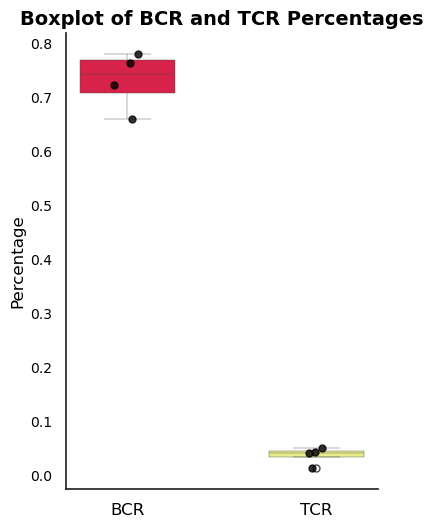

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# -------------------------------------------------
# 1. 取出两组数据
bcr_indices = [0, 4, 8, 10]
tcr_indices = [0, 1, 8, 10]

bcr_vals = data['B_percent'].iloc[bcr_indices].dropna().values
tcr_vals = data['T_percent'].iloc[tcr_indices].dropna().values

# -------------------------------------------------
# 2. 画布
plt.figure(figsize=(4, 6))
sns.set_style('white')          # 白底
sns.set_context('notebook')

# -------------------------------------------------
# 3. 箱线图
sns.boxplot(data=[bcr_vals, tcr_vals],
            palette=['#F50538', '#FBFD79'],
            linewidth=0.3,
            width=0.5,
            fliersize=5)

# -------------------------------------------------
# 4. 叠加散点（黑色，带抖动）
for x_pos, vals in enumerate([bcr_vals, tcr_vals]):
    x_jitter = np.random.normal(loc=x_pos, scale=0.05, size=len(vals))
    plt.scatter(x_jitter, vals,
                color='black',
                alpha=0.8,
                s=25,
                zorder=3)

# -------------------------------------------------
# 5. 黑字黑刻度
plt.title('Boxplot of BCR and TCR Percentages',
          fontsize=14, fontweight='bold', color='black')
plt.xticks([0, 1], ['BCR', 'TCR'], fontsize=12, color='black')
plt.ylabel('Percentage', fontsize=12, color='black')
plt.yticks(fontsize=10, color='black')

# 边框黑化
sns.despine()
plt.grid(False)

# -------------------------------------------------
# 6. 保存
plt.savefig('figure3C.pdf', dpi=600, bbox_inches='tight')
plt.show()

# Suo3D E

In [15]:
adata = sc.read_h5ad('/data1/fengyu/methods/zy/P5_D06053D2_ananlysis/cellbin/old/P5_D06053D2_cellbin_adjusted_scanpy_out.h5ad')

In [16]:
if hasattr(adata.X, "toarray"): 
    gene_counts = np.array(adata.X.sum(axis=0)).flatten()
else:  
    gene_counts = adata.X.sum(axis=0)

In [17]:
gene_counts_df = pd.DataFrame({'gene': adata.var_names, 'counts_sum': gene_counts})

In [18]:
# 要汇总的基因列表
genes_to_sum = ['IGKC','IGLC1','IGLC2','IGLC3','IGLC4','IGLC5','IGLC6','IGLC7']

# 计算这四个基因 counts_sum 的总和
total = gene_counts_df.loc[gene_counts_df['gene'].isin(genes_to_sum), 'counts_sum'].sum()

# 将结果作为新行追加到原数据框
gene_counts_df = pd.concat(
    [gene_counts_df, pd.DataFrame({'gene': ['IGKL'], 'counts_sum': [total]})],
    ignore_index=True
)



# 要汇总的基因列表
genes_to_sum = ['TRAC']

# 计算这四个基因 counts_sum 的总和
total = gene_counts_df.loc[gene_counts_df['gene'].isin(genes_to_sum), 'counts_sum'].sum()

# 将结果作为新行追加到原数据框
gene_counts_df = pd.concat(
    [gene_counts_df, pd.DataFrame({'gene': ['TRA'], 'counts_sum': [total]})],
    ignore_index=True
)



# 要汇总的基因列表
genes_to_sum = ['TRBC1','TRBC2']

# 计算这四个基因 counts_sum 的总和
total = gene_counts_df.loc[gene_counts_df['gene'].isin(genes_to_sum), 'counts_sum'].sum()

# 将结果作为新行追加到原数据框
gene_counts_df = pd.concat(
    [gene_counts_df, pd.DataFrame({'gene': ['TRB'], 'counts_sum': [total]})],
    ignore_index=True
)

In [19]:
df_sorted = gene_counts_df.sort_values(by='counts_sum', ascending=False)
df_filtered = df_sorted [df_sorted ['counts_sum'] != 0]
df_filtered =  df_filtered.reset_index()
df_filtered['ranking'] = df_filtered.index
df_filtered['ranking'] = df_filtered['ranking'] + 1

In [20]:
df_filtered['counts_sum'] = np.log2(df_filtered['counts_sum'])

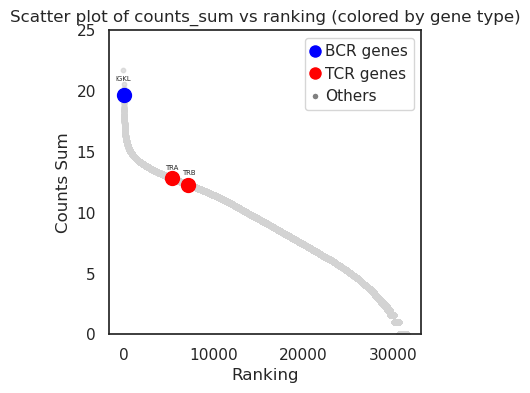

In [21]:
import matplotlib.pyplot as plt
import numpy as np

igh_genes = ['IGH','IGKL']
trbc_genes = ['TRB', 'TRA']

# 定义颜色列和大小列
colors = []
sizes = []

for gene in df_filtered['gene']:
    if gene in igh_genes:
        colors.append('blue')
        sizes.append(50)
    elif gene in trbc_genes:
        colors.append('red')
        sizes.append(50)
    else:
        colors.append('lightgrey')
        sizes.append(5)

# 先画 Others（黑色）
mask_others = ~(df_filtered['gene'].isin(igh_genes + trbc_genes))
plt.scatter(
    df_filtered.loc[mask_others, 'ranking'],
    df_filtered.loc[mask_others, 'counts_sum'],
    c='lightgrey',
    s=10,
    alpha=0.7,
    zorder=1          # 黑色在最底层
)

# 再画 IGH（蓝色）
mask_igh = df_filtered['gene'].isin(igh_genes)
plt.scatter(
    df_filtered.loc[mask_igh, 'ranking'],
    df_filtered.loc[mask_igh, 'counts_sum'],
    c='blue',
    s=100,
    zorder=2          # 蓝色在中间
)

# 最后画 TRBC（红色）
mask_trbc = df_filtered['gene'].isin(trbc_genes)
plt.scatter(
    df_filtered.loc[mask_trbc, 'ranking'],
    df_filtered.loc[mask_trbc, 'counts_sum'],
    c='red',
    s=100,
    zorder=3          # 红色在最上层
)

for _, row in df_filtered.iterrows():
    gene = row['gene']
    if gene in igh_genes or gene in trbc_genes:
        # 加一点随机垂直偏移，避免文字压点
        y_offset = np.random.uniform(0.02, 0.05) * 25
        plt.text(
            row['ranking'],
            row['counts_sum'] + y_offset,
            gene,
            fontsize=5,
            ha='center',
            va='bottom'
        )

# 设置轴范围
plt.ylim(0, 25)

# 标题与标签
plt.title('Scatter plot of counts_sum vs ranking (colored by gene type)')
plt.xlabel('Ranking')
plt.ylabel('Counts Sum')

# 图例（手动更新大小一致）
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='BCR genes', markerfacecolor='blue', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='TCR genes', markerfacecolor='red', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Others', markerfacecolor='gray', markersize=5)
]
plt.legend(handles=legend_elements)

plt.grid(False)
plt.savefig('P5_ranking_gene.pdf')
plt.show()

In [22]:
adata = sc.read_10x_h5('/data1/zhangyang/Method/Sup2/10X_Visium/P10_T2-filtered_feature_bc_matrix.h5')

/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [23]:
if hasattr(adata.X, "toarray"): 
    gene_counts = np.array(adata.X.sum(axis=0)).flatten()
else:  
    gene_counts = adata.X.sum(axis=0)

In [24]:
gene_counts_df = pd.DataFrame({'gene': adata.var_names, 'counts_sum': gene_counts})

In [25]:
# 要汇总的基因列表
genes_to_sum = ['IGHM', 'IGHG1', 'IGHG2', 'IGHG3', 'IGHG4','IGHA1', 'IGHA2', 'IGHD', 'IGHE']

# 计算这四个基因 counts_sum 的总和
total = gene_counts_df.loc[gene_counts_df['gene'].isin(genes_to_sum), 'counts_sum'].sum()

# 将结果作为新行追加到原数据框
gene_counts_df = pd.concat(
    [gene_counts_df, pd.DataFrame({'gene': ['IGH'], 'counts_sum': [total]})],
    ignore_index=True
)

In [26]:
# 要汇总的基因列表
genes_to_sum = ['IGKC','IGLC1','IGLC2','IGLC3','IGLC4','IGLC5','IGLC6','IGLC7']

# 计算这四个基因 counts_sum 的总和
total = gene_counts_df.loc[gene_counts_df['gene'].isin(genes_to_sum), 'counts_sum'].sum()

# 将结果作为新行追加到原数据框
gene_counts_df = pd.concat(
    [gene_counts_df, pd.DataFrame({'gene': ['IGKL'], 'counts_sum': [total]})],
    ignore_index=True
)

In [27]:
# 要汇总的基因列表
genes_to_sum = ['TRAC']

# 计算这四个基因 counts_sum 的总和
total = gene_counts_df.loc[gene_counts_df['gene'].isin(genes_to_sum), 'counts_sum'].sum()

# 将结果作为新行追加到原数据框
gene_counts_df = pd.concat(
    [gene_counts_df, pd.DataFrame({'gene': ['TRA'], 'counts_sum': [total]})],
    ignore_index=True
)

In [28]:
# 要汇总的基因列表
genes_to_sum = ['TRBC1','TRBC2']

# 计算这四个基因 counts_sum 的总和
total = gene_counts_df.loc[gene_counts_df['gene'].isin(genes_to_sum), 'counts_sum'].sum()

# 将结果作为新行追加到原数据框
gene_counts_df = pd.concat(
    [gene_counts_df, pd.DataFrame({'gene': ['TRB'], 'counts_sum': [total]})],
    ignore_index=True
)

In [29]:
df_sorted = gene_counts_df.sort_values(by='counts_sum', ascending=False)
df_filtered = df_sorted [df_sorted ['counts_sum'] != 0]
df_filtered =  df_filtered.reset_index()
df_filtered['ranking'] = df_filtered.index
df_filtered['ranking'] = df_filtered['ranking'] + 1

In [30]:
df_filtered['counts_sum'] = np.log2(df_filtered['counts_sum'])

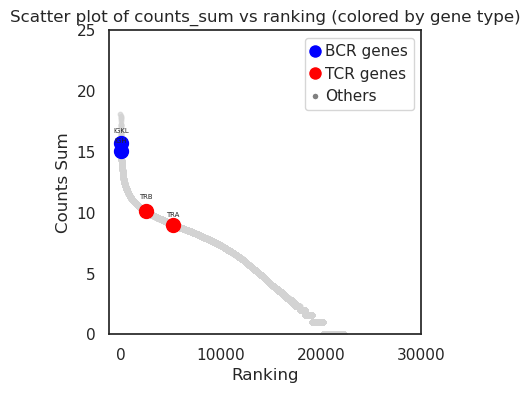

In [31]:
import matplotlib.pyplot as plt
import numpy as np

igh_genes = ['IGH','IGKL']
trbc_genes = ['TRB', 'TRA']

# 定义颜色列和大小列
colors = []
sizes = []

for gene in df_filtered['gene']:
    if gene in igh_genes:
        colors.append('blue')
        sizes.append(50)
    elif gene in trbc_genes:
        colors.append('red')
        sizes.append(50)
    else:
        colors.append('black')
        sizes.append(5)

# 先画 Others（黑色）
mask_others = ~(df_filtered['gene'].isin(igh_genes + trbc_genes))
plt.scatter(
    df_filtered.loc[mask_others, 'ranking'],
    df_filtered.loc[mask_others, 'counts_sum'],
    c='lightgrey',
    s=10,
    alpha=0.7,
    zorder=1          # 黑色在最底层
)

# 再画 IGH（蓝色）
mask_igh = df_filtered['gene'].isin(igh_genes)
plt.scatter(
    df_filtered.loc[mask_igh, 'ranking'],
    df_filtered.loc[mask_igh, 'counts_sum'],
    c='blue',
    s=100,
    zorder=2          # 蓝色在中间
)

# 最后画 TRBC（红色）
mask_trbc = df_filtered['gene'].isin(trbc_genes)
plt.scatter(
    df_filtered.loc[mask_trbc, 'ranking'],
    df_filtered.loc[mask_trbc, 'counts_sum'],
    c='red',
    s=100,
    zorder=3          # 红色在最上层
)

for _, row in df_filtered.iterrows():
    gene = row['gene']
    if gene in igh_genes or gene in trbc_genes:
        # 加一点随机垂直偏移，避免文字压点
        y_offset = np.random.uniform(0.02, 0.05) * 25
        plt.text(
            row['ranking'],
            row['counts_sum'] + y_offset,
            gene,
            fontsize=5,
            ha='center',
            va='bottom'
        )

# 设置轴范围
plt.ylim(0, 25)
plt.xticks([0, 10000, 20000, 30000])

# 标题与标签
plt.title('Scatter plot of counts_sum vs ranking (colored by gene type)')
plt.xlabel('Ranking')
plt.ylabel('Counts Sum')

# 图例（手动更新大小一致）
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='BCR genes', markerfacecolor='blue', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='TCR genes', markerfacecolor='red', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Others', markerfacecolor='gray', markersize=5)
]
plt.legend(handles=legend_elements)

plt.grid(False)
plt.savefig('10X_Visium_gene.pdf')
plt.show()

# Sup3F G

In [32]:
adata = sc.read_h5ad('/data3/zhanxiaojuan/03.LC/01.XCR/M1ML150001777_L01_D06053D2/04.processed_meta/M1ML150001777_L01_D06053D2.meta.preprocessed.h5ad')

/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [33]:
adata.obs[adata.obs['TRAcdr3aa'].notna()].shape[0]

19215

In [34]:
adata.obs[adata.obs['TRBcdr3aa'].notna()].shape[0]

19092

In [35]:
adata.obs[adata.obs['TRAcdr3aa'].notna() & adata.obs['TRBcdr3aa'].notna()].shape[0]

12408

/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


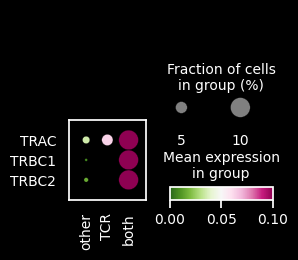

In [36]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt

# 提取 TRBC 表达量
tmp = adata[:, ['TRBC1', 'TRBC2']].to_df()
tmp['TRBC'] = tmp['TRBC1'] + tmp['TRBC2']

# 合并回 obs
adata.obs = adata.obs.join(tmp[['TRBC']])

# 设置 TCR+ 分类
adata.obs['TCR+'] = 'other'
adata.obs.loc[adata.obs['TRBcdr3aa'].notna(), 'TCR+'] = 'TCR'
adata.obs.loc[(adata.obs['TCR+'] == 'TCR') & (adata.obs['TRBC'] > 0), 'TCR+'] = 'both'

# 设置分类顺序
adata.obs['TCR+'] = pd.Categorical(
    adata.obs['TCR+'],
    categories=['other', 'TCR', 'both'],
    ordered=True
)

# 绘图
plt.style.use('dark_background')
sc.pl.dotplot(
    adata,
    ['TRAC', 'TRBC1', 'TRBC2'],
    groupby='TCR+',
    vmax=0.1,  # 可根据实际表达量调整
    dot_max=0.1,
    swap_axes=True,
    cmap='PiYG_r',
    save='sup3f.pdf'
)